<a href="https://colab.research.google.com/github/barauna-lo/CAP4213-Deep-Learning/blob/main/AT7_CNN_Aprendizado_Profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-421-3: Aprendizado Profundo
## Atividade 7 :  **Uso de Rede Convolucional na classificação de extração e não extração de árvores na Floresta Amazônica.**

* Luan Orion Baraúna 

* Vinicius Monego

Neste código, iremos constuir uma Rede Neural Convolucional para prever a classificação de extração e não extração de arvores. 

Para modelos de redes neurais a _arquitetura_ da rede, ou seja, a quantidade de camadas e os hiperparâmetros de cada camada possuem um papel crucial na previsibilidade do modelo. A diferença entre o número de camadas e/ou o número de neurônios entre duas redes por definição, caracteriza redes com arquiteturas diferentes. 

E este código esta dividito em duas partes.

* 1 - Processamento de Imagens

* 2 - Modelo de Redes Neurais Convolucionais

## Processamento de Imagens

Nesta primeira célula célula iremos importar as bibliotecas necessárias e em seguidas iremos acessar uma pasta do drive atravéz do ```!gdonw``` e extrairemos parte dos arquivos que estão dentro destas pastas

In [62]:
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

#!gdown --id 16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3

#!unrar x "/content/covmingrad.rar" "/content/sample_data/treinamento/"

Nesta célula iremos crirar novas pastas usando o comando ```mkdir``` e iremos redimensionar todas as imagens para imagens do mesmo tamanho.

Vale ressaltar que existe um comando ```!rm``` para remover um arquivo que esta dentro da pasta e não será útil para as análises (pelo menos foi isso que eu entendi)

In [63]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/sample_data/treinamento/non-logging/"
dirs = os.listdir( path )

!mkdir "/content/sample_data/treinamento/non-logging-resized/"
path2 = "/content/sample_data/treinamento/non-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()


#!/usr/bin/python
from PIL import Image
import os, sys

!rm "/content/sample_data/treinamento/selective-logging/extrac_Id_1112.tif.aux.xml"

path = "/content/sample_data/treinamento/selective-logging/"
dirs = os.listdir( path )

!mkdir "/content/sample_data/treinamento/selective-logging-resized/"
path2 = "/content/sample_data/treinamento/selective-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

mkdir: cannot create directory ‘/content/sample_data/treinamento/non-logging-resized/’: File exists
rm: cannot remove '/content/sample_data/treinamento/selective-logging/extrac_Id_1112.tif.aux.xml': No such file or directory
mkdir: cannot create directory ‘/content/sample_data/treinamento/selective-logging-resized/’: File exists


Nesta célula iremos criar pasta para treinamos, validação e iremos converter os aquivos de ```.tif``` para ```.jpg```. Este mudança de formato faz com que os dados de localização geoespaciais sejam perdidos. 

In [64]:
import os
from PIL import Image
!mkdir "/content/sample_data/treinamento/train/"
!mkdir "/content/sample_data/treinamento/train/non-logging-resized"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/non-logging-resized"

root1 = "/content/sample_data/treinamento/non-logging-resized"
root2 = "/content/sample_data/treinamento/train/non-logging-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)




import os
from PIL import Image
!mkdir "/content/sample_data/treinamento/train/selective-loggin-resized/"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/selective-logging-resized"

root1 = "/content/sample_data/treinamento/selective-logging-resized"
root2 = "/content/sample_data/treinamento/train/selective-loggin-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)                    

A saída de streaming foi truncada nas últimas 5000 linhas.
Generating jpeg for _Id_101309 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_16748 resized.tiff
Generating jpeg for _Id_16748 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_101267 resized.tiff
Generating jpeg for _Id_101267 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_22288 resized.tiff
Generating jpeg for _Id_22288 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_88231 resized.tiff
Generating jpeg for _Id_88231 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_89390 resized.tiff
Generating jpeg for _Id_89390 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_144610 resized.tiff
Generating jpeg for _Id_144610 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_33668 resized.tiff
Generating jpeg for _Id_33668 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_140

Nesta célula iremos dividir as imagens entre conjunto de traino, teste e validação.

In [65]:
!pip install split-folders
import splitfolders

!mkdir "/content/sample_data/train&test"
!mkdir "/content/sample_data/train&test/non-logging-resized"

input_folder = "/content/sample_data/treinamento/train/"
output_folder = "/content/sample_data/treinamento/train&test" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

#Defing the size of tthe image
image_size = (50, 50)
batch_size = 32

#Using Keras library for slipt data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/val",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

#??????
class_names = train_ds.class_names
print(class_names)

mkdir: cannot create directory ‘/content/sample_data/train&test’: File exists
mkdir: cannot create directory ‘/content/sample_data/train&test/non-logging-resized’: File exists


Copying files: 4324 files [00:00, 7039.81 files/s]


Found 3459 files belonging to 2 classes.
Using 2768 files for training.
Found 432 files belonging to 2 classes.
Using 86 files for validation.
['non-logging-resized', 'selective-loggin-resized']


Nesa célula iremos realiza um leve aumento no conjunto de dados. 

In [66]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

## Modelo de Redes Neurais Convolucionais

Uma vez feita o tratamento de dados das imagens, iremos utilizar três modelos as redes neurais convocionais para previsão de extração ilegal

### Modelo 0: Modelo Padrão

Este primeiro modelo é o modelo _standar_ do exercício. Utilizaremos ele como um modelo para comparação



#### Passo 1 

Escrever um pouco aqui sobre os hiper parâmetros

In [67]:
keras.backend.clear_session()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

model0 = make_model(       input_shape=image_size + (3,), num_classes=2) 

#printig the model sumaridez 
#keras.utils.plot_model(model0, show_shapes=True)

#### Passo 2

* Defindo as condições de paradas para o modelo
* Defindo o numero de épocas
* Compilando o modelo
* Definindo um vetor com os parâmetros de Treinamento

In [68]:
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# DEFING THE EPOCH NUMBERS
epochs = 100

# COMPILING THE MODEL
model0.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

# Creating a dataframe with a the model paramentes
history0 = model0.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 25s 112ms/step - loss: 2.6720 - accuracy: 0.7782 - val_loss: 0.3776 - val_accuracy: 0.8372
Epoch 2/100
87/87 [==============================] - 10s 111ms/step - loss: 0.4018 - accuracy: 0.8537 - val_loss: 0.3011 - val_accuracy: 0.8605
Epoch 3/100
87/87 [==============================] - 10s 111ms/step - loss: 0.3550 - accuracy: 0.8652 - val_loss: 0.3322 - val_accuracy: 0.8837
Epoch 4/100
87/87 [==============================] - 10s 110ms/step - loss: 0.3130 - accuracy: 0.8696 - val_loss: 0.3880 - val_accuracy: 0.8837
Epoch 5/100
87/87 [==============================] - 10s 110ms/step - loss: 0.2854 - accuracy: 0.8837 - val_loss: 0.3709 - val_accuracy: 0.8837
Epoch 6/100
87/87 [==============================] - 10s 110ms/step - loss: 0.2763 - accuracy: 0.8862 - val_loss: 0.3914 - val_accuracy: 0.9070
Epoch 7/100
87/87 [==============================] - 10s 110ms/step - loss: 0.2630 - accuracy: 0.8895 - val_loss: 0.4585 - val_accuracy:

Imprimindo o sumário do modelo

In [69]:
#Model Summary

#model0.summary()

#### Passo 3

Alocando os valores de cada um dos dataframes e gerando os gráficos.

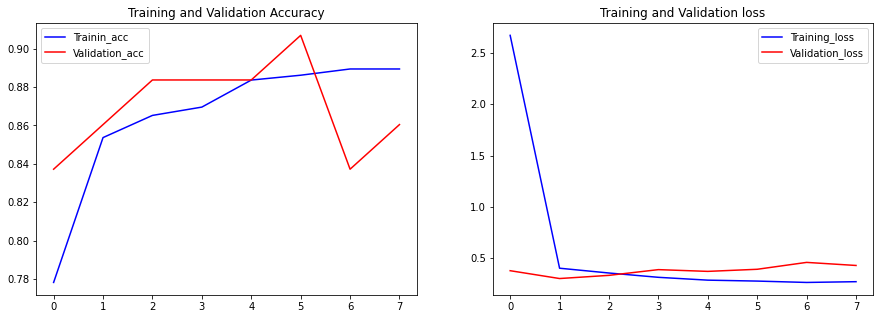

In [70]:
acc0 =      history0.history['accuracy']
val_acc0 =  history0.history['val_accuracy']
loss0 =     history0.history['loss']
val_loss0 = history0.history['val_loss']
epochs0=range(len(acc0))

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(epochs0,acc0,    label='Trainin_acc',   color='blue')
plt.plot(epochs0,val_acc0,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(122)
plt.plot(epochs0,loss0,    label='Training_loss',  color='blue')
plt.plot(epochs0,val_loss0,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

plt.show()

### Modelo 1: _Simple is Best_




#### Passo 1 

Escrever um pouco aqui sobre os hiper parâmetros

In [71]:
keras.backend.clear_session()

def make_fist_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

model1 = make_fist_model(       input_shape=image_size + (3,), num_classes=2) 

#printig the model sumaridez 
#keras.utils.plot_model(model0, show_shapes=True)

#### Passo 2

* Defindo as condições de paradas para o modelo
* Defindo o numero de épocas
* Compilando o modelo
* Dedinindo um vetor com os parâmetros de Treinamento

In [72]:
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# DEFING THE EPOCH NUMBERS
epochs = 100

# COMPILING THE MODEL
model1.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

# Creating a dataframe with a the model paramentes
history1 = model1.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 7s 69ms/step - loss: 10.7036 - accuracy: 0.7944 - val_loss: 1.1652 - val_accuracy: 0.7674
Epoch 2/100
87/87 [==============================] - 6s 66ms/step - loss: 0.7146 - accuracy: 0.8316 - val_loss: 0.5360 - val_accuracy: 0.8721
Epoch 3/100
87/87 [==============================] - 6s 66ms/step - loss: 0.3988 - accuracy: 0.8642 - val_loss: 0.5096 - val_accuracy: 0.8488
Epoch 4/100
87/87 [==============================] - 6s 65ms/step - loss: 0.3266 - accuracy: 0.8746 - val_loss: 0.3985 - val_accuracy: 0.8605
Epoch 5/100
87/87 [==============================] - 6s 65ms/step - loss: 0.2949 - accuracy: 0.8757 - val_loss: 0.4838 - val_accuracy: 0.8372
Epoch 6/100
87/87 [==============================] - 6s 65ms/step - loss: 0.2959 - accuracy: 0.8829 - val_loss: 0.4753 - val_accuracy: 0.8488
Epoch 7/100
87/87 [==============================] - 6s 65ms/step - loss: 0.2754 - accuracy: 0.8819 - val_loss: 0.5276 - val_accuracy: 0.8372
Epoch

Imprimindo o sumário do modelo

In [73]:
#Model Summary

#model0.summary()

#### Passo 3

Alocando os valores de cada um dos dataframes e gerando os gráficos.

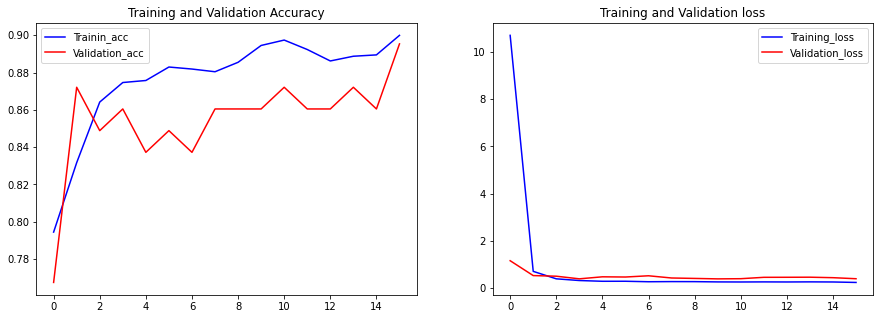

In [75]:
acc1 =      history1.history['accuracy']
val_acc1 =  history1.history['val_accuracy']
loss1 =     history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1=range(len(acc1))

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(epochs1,acc1,    label='Trainin_acc',   color='blue')
plt.plot(epochs1,val_acc1,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(122)
plt.plot(epochs1,loss1,    label='Training_loss',  color='blue')
plt.plot(epochs1,val_loss1,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

plt.show()

### Modelo 2: _More is less_

_figura do modelo_

> Explicar um pouco por que escolhemos esses hiperparâmetros 



#### Passo 1 

Escrever um pouco aqui sobre os hiper parâmetros

In [76]:
keras.backend.clear_session()

def make_second_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, kernel_size=(5, 5), activation="LeakyReLU")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(5, 5), activation="LeakyReLU")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

#defing the model

model2 = make_second_model(input_shape=image_size + (3,), num_classes=2)
#printig the model sumaridez 
#keras.utils.plot_model(model0, show_shapes=True)

#### Passo 2

* Defindo as condições de paradas para o modelo
* Defindo o numero de épocas
* Compilando o modelo
* Dedinindo um vetor com os parâmetros de Treinamento



In [77]:
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# DEFING THE EPOCH NUMBERS
epochs = 100

# COMPILING THE MODEL
model2.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

# Creating a dataframe with a the model paramentes
history2 = model2.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 17s 185ms/step - loss: 1.9529 - accuracy: 0.7858 - val_loss: 0.3206 - val_accuracy: 0.8488
Epoch 2/100
87/87 [==============================] - 16s 184ms/step - loss: 0.3215 - accuracy: 0.8721 - val_loss: 0.3137 - val_accuracy: 0.8721
Epoch 3/100
87/87 [==============================] - 16s 183ms/step - loss: 0.3210 - accuracy: 0.8699 - val_loss: 0.3780 - val_accuracy: 0.8721
Epoch 4/100
87/87 [==============================] - 16s 184ms/step - loss: 0.2793 - accuracy: 0.8902 - val_loss: 0.4456 - val_accuracy: 0.8605
Epoch 5/100
87/87 [==============================] - 16s 185ms/step - loss: 0.2955 - accuracy: 0.8869 - val_loss: 0.3478 - val_accuracy: 0.9070
Epoch 6/100
87/87 [==============================] - 16s 185ms/step - loss: 0.2745 - accuracy: 0.8905 - val_loss: 0.2842 - val_accuracy: 0.8953
Epoch 7/100
87/87 [==============================] - 16s 185ms/step - loss: 0.2795 - accuracy: 0.8873 - val_loss: 0.4125 - val_accuracy:

In [78]:
#Model Summary

#model0.summary()

#### Passo 3

Alocando os valores de cada um dos dataframes e gerando os gráficos.

In [ ]:
acc2 =      history2.history['accuracy']
val_acc2 =  history2.history['val_accuracy']
loss2 =     history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2=range(len(acc2))

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(epochs2,acc2,    label='Trainin_acc',   color='blue')
plt.plot(epochs2,val_acc2,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(122)
plt.plot(epochs2,loss2,    label='Training_loss',  color='blue')
plt.plot(epochs2,val_loss2,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

plt.show()

### Modelo 3: _The Funnels_ ⏳

_figura do modelo_

> Explicar um pouco por que escolhemos esses hiperparâmetros 



#### Passo 1 

Escrever um pouco aqui sobre os hiper parâmetros

In [113]:
keras.backend.clear_session()

def make_terceiro_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(128, kernel_size=(5, 5), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(6, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

#defing the model

model3 = make_terceiro_model(input_shape=image_size + (3,), num_classes=2)
#printig the model sumaridez 
#keras.utils.plot_model(model0, show_shapes=True)

#### Passo 2

* Defindo as condições de paradas para o modelo
* Defindo o numero de épocas
* Compilando o modelo
* Dedinindo um vetor com os parâmetros de Treinamento



In [ ]:
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# DEFING THE EPOCH NUMBERS
epochs = 100

# COMPILING THE MODEL
model3.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

# Creating a dataframe with a the model paramentes
history3 = model3.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 27s 303ms/step - loss: 1.0016 - accuracy: 0.7605 - val_loss: 0.4642 - val_accuracy: 0.6744
Epoch 2/100
87/87 [==============================] - 26s 299ms/step - loss: 0.5109 - accuracy: 0.7699 - val_loss: 0.4313 - val_accuracy: 0.6744
Epoch 3/100
87/87 [==============================] - 26s 299ms/step - loss: 0.4906 - accuracy: 0.7699 - val_loss: 0.4233 - val_accuracy: 0.6744
Epoch 4/100
87/87 [==============================] - 26s 300ms/step - loss: 0.5185 - accuracy: 0.7699 - val_loss: 0.4633 - val_accuracy: 0.6744
Epoch 5/100
87/87 [==============================] - 26s 300ms/step - loss: 0.5072 - accuracy: 0.7695 - val_loss: 0.4736 - val_accuracy: 0.6744
Epoch 6/100
87/87 [==============================] - 26s 298ms/step - loss: 0.4999 - accuracy: 0.7699 - val_loss: 0.4891 - val_accuracy: 0.6744
Epoch 7/100
87/87 [==============================] - 26s 299ms/step - loss: 0.4983 - accuracy: 0.7699 - val_loss: 0.4776 - val_accuracy:

In [107]:
#Model Summary

#model0.summary()

#### Passo 3

Alocando os valores de cada um dos dataframes e gerando os gráficos.

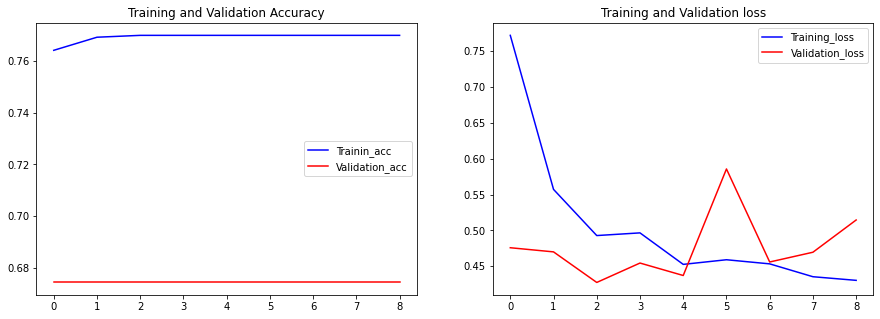

In [108]:
acc3 =      history3.history['accuracy']
val_acc3 =  history3.history['val_accuracy']
loss3 =     history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3=range(len(acc3))

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(epochs3,acc3,    label='Trainin_acc',   color='blue')
plt.plot(epochs3,val_acc3,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(122)
plt.plot(epochs3,loss3,    label='Training_loss',  color='blue')
plt.plot(epochs3,val_loss3,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

plt.show()

In [ ]:
image_path = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100019 resized.jpg"
image_path2 = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100092 resized.jpg"
image_path3 = "/content/sample_data/treinamento/train&test/test/non-logging-resized/_Id_100003 resized.jpg"
merged_path = [image_path,image_path2,image_path3]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model1.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    pred_class = np.argmax(predictions)

    pred_class = class_names[pred_class]

    
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
    print('prediction: ',pred_class)